In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep = ',', index_col = 0)

R2:  -0.5366278907540707
RMSE: 0.09721662345308543


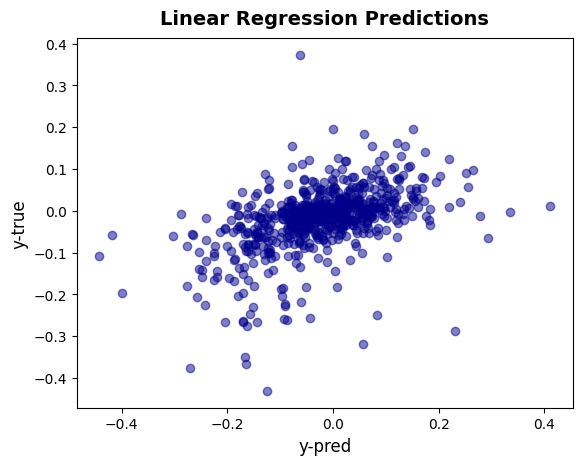

In [3]:
random.seed(41)

target_column = random.choice(NxN.columns)  # Randomly pick a column name

X = NxN.drop(columns=[target_column])  # Features (all columns except the target)
y = NxN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

In [4]:
print(target_column)

DMA_YAR029W


0.536850690089077


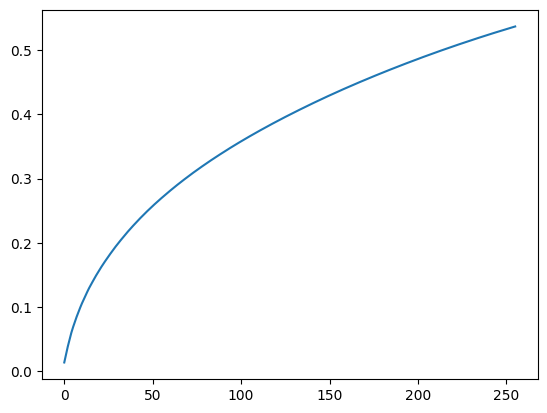

In [5]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [6]:
dims = 1024
NxN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
NxN_PCA

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.194308,0.238852,0.078280,0.243440,0.567316,-0.123241,0.400882,-0.195968,0.136165,0.293807,...,0.018695,0.030589,0.011667,-0.013671,0.067246,0.003963,-0.065486,0.022886,-0.011711,0.025977
1,-0.171988,0.261264,0.060871,0.020147,0.317746,-0.274350,0.168200,-0.128616,-0.177724,0.168825,...,0.013101,0.075981,-0.007921,-0.009388,-0.005384,-0.011001,0.010059,0.011881,0.068480,-0.007463
2,-0.174504,0.104511,0.110911,0.011096,0.166591,-0.355387,0.121406,-0.252192,-0.030053,0.230064,...,0.031969,0.030403,-0.037777,-0.013915,-0.007576,-0.018053,0.017486,-0.014154,-0.051793,-0.004823
3,-0.125001,0.126240,0.278113,0.154176,0.054191,-0.465093,0.282208,-0.441966,-0.248944,0.478673,...,-0.016864,-0.048463,0.017544,-0.011053,-0.029637,0.003612,0.047077,0.017079,-0.062932,-0.021991
4,0.008817,0.173195,0.106702,-0.079671,-0.022501,0.104180,0.146920,-0.060365,-0.101525,0.262176,...,0.011556,0.000119,-0.004617,0.011442,0.001928,-0.005771,0.009857,0.018269,0.004306,0.004057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,0.420109,0.105292,-0.138504,0.273089,0.043531,-0.298954,0.279418,0.123049,-0.166804,0.041800,...,0.040486,0.014331,0.021513,0.022367,0.017607,-0.069313,0.003079,-0.000130,-0.033277,0.025182
3279,0.395435,0.261385,0.016397,0.358372,-0.079171,-0.199176,-0.015665,0.162589,-0.033149,-0.068051,...,-0.052012,-0.000848,-0.001721,-0.005885,-0.003748,0.015148,0.013859,0.005179,-0.035511,0.049020
3280,0.445644,0.077688,-0.020429,0.303447,-0.085018,-0.083067,0.030651,0.005333,-0.081883,0.015604,...,0.065295,0.034645,0.022599,0.102594,-0.013406,0.005415,-0.018171,0.004200,0.018225,0.002176
3281,0.164011,0.214643,-0.015473,0.323865,-0.107968,-0.103742,-0.045813,0.119039,-0.112075,-0.092216,...,0.021314,-0.034935,0.022069,0.024244,-0.014922,0.007167,0.005302,-0.044681,0.023185,-0.031962


R2:  0.10213151767013817
RMSE: 0.07431261441521664


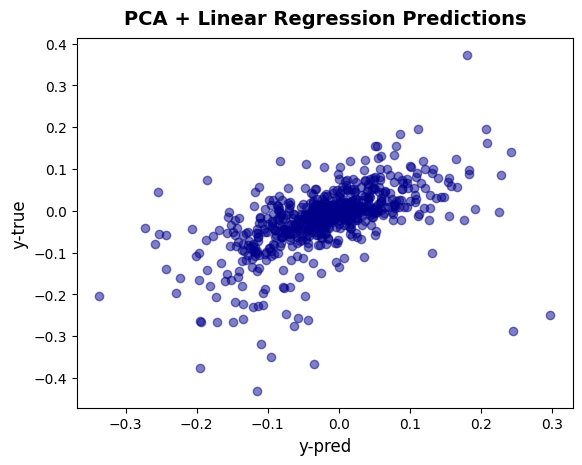

In [7]:
X_train, X_test, y_train, y_test = train_test_split(NxN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

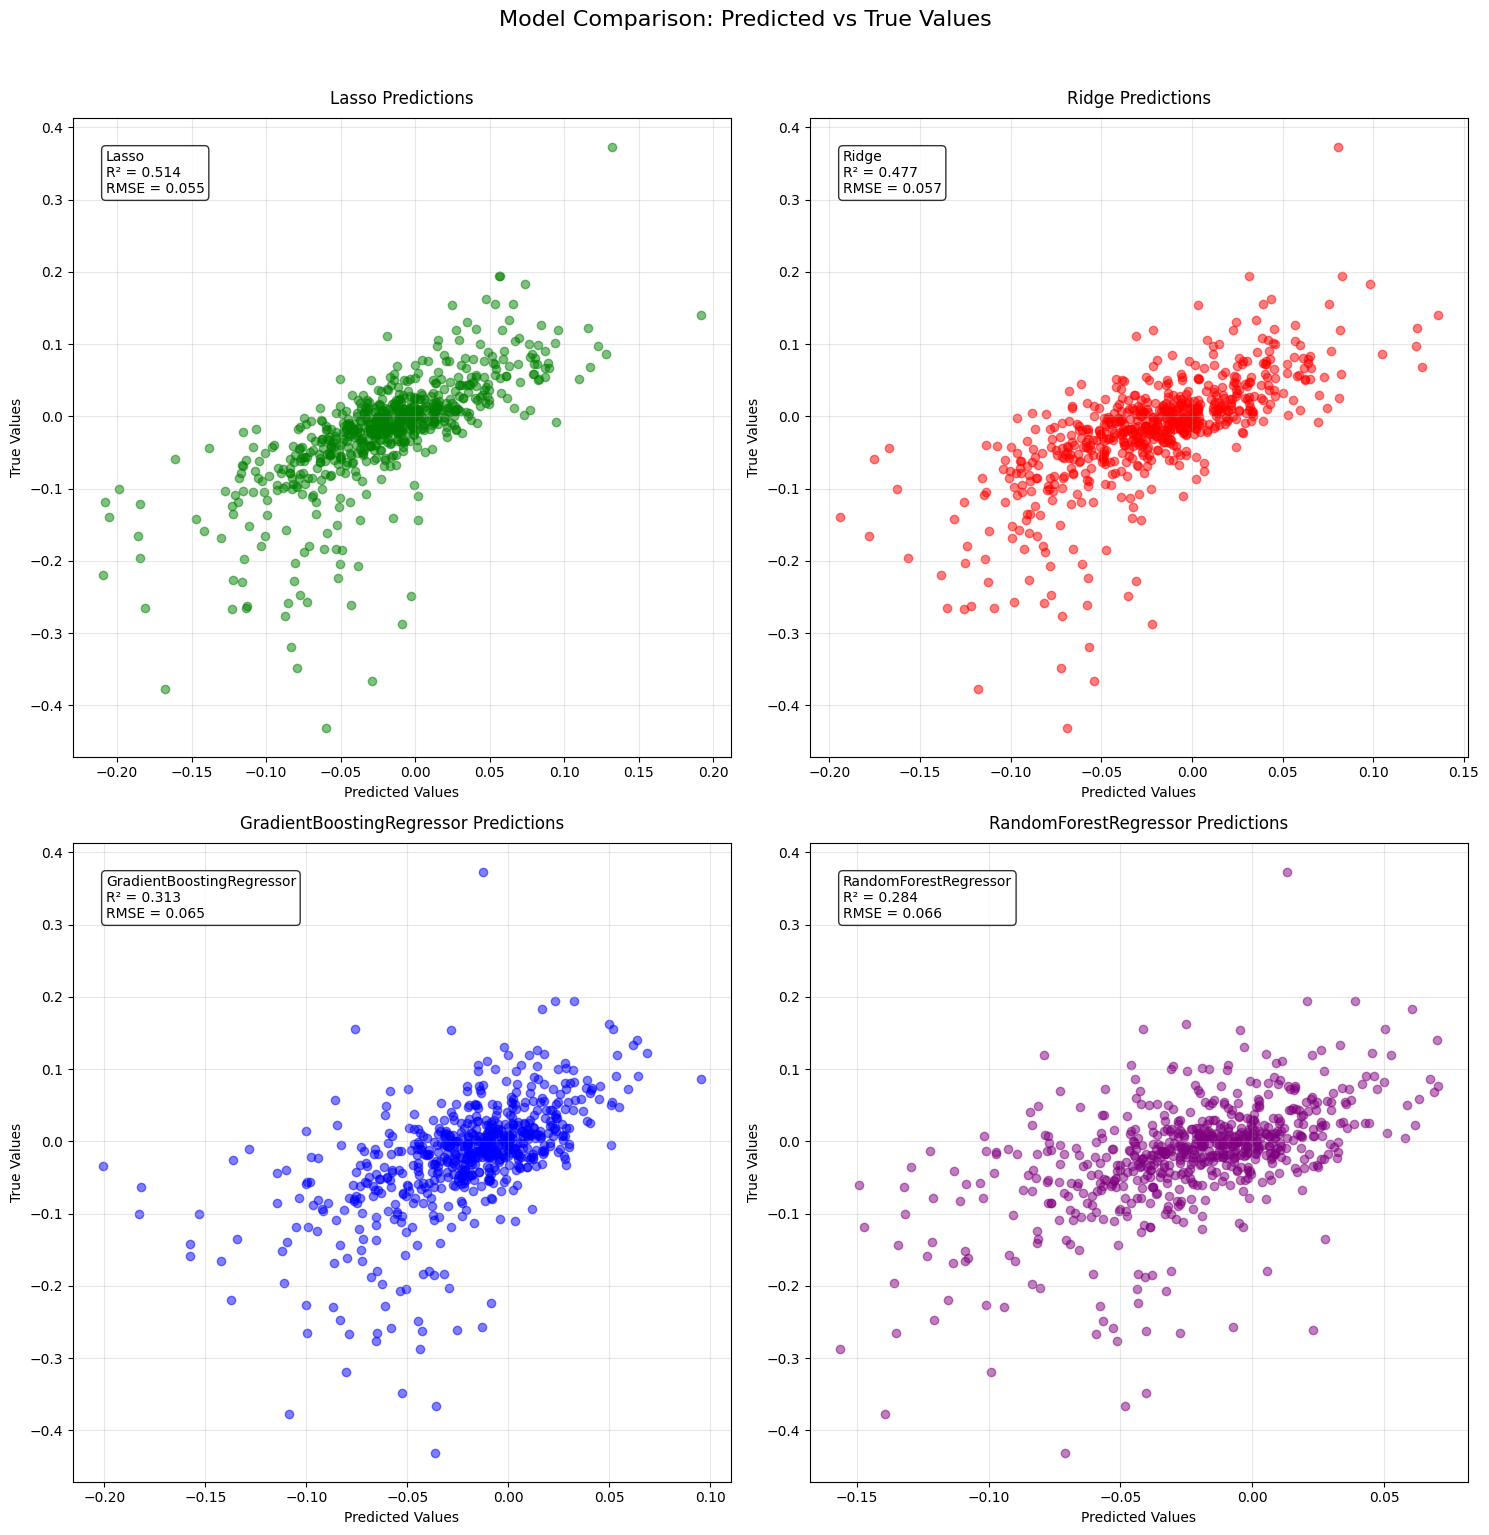

In [8]:
predictive_models = [ 
                      Lasso(alpha=0.0001), 
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42),

]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6625e-04 - mse: 9.6625e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0781e-04 - mse: 6.0781e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6524e-04 - mse: 5.6524e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5176e-04 - mse: 3.5176e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1042e-04 - mse: 2.1042e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3922e-04 - mse: 1.3922e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 9/50
66/66 ━━━━━━━

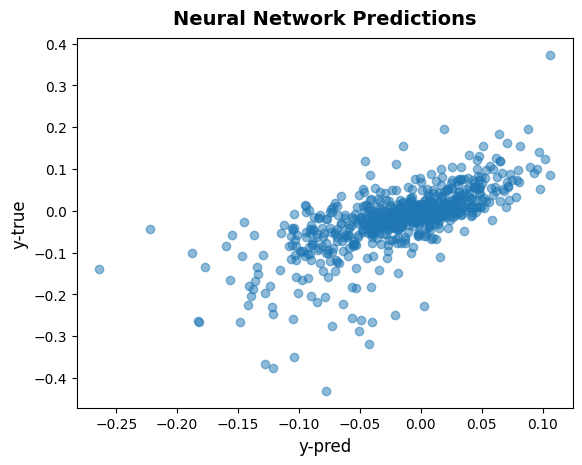

In [9]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()